LINK CODE : https://github.com/radityanurfadillah/mini-workshop-recsys

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

Dataset yang digunakan pada workshop ini adalah MovieLens 100K.

In [2]:
link_ratings = "https://github.com/radityanurfadillah/mini-workshop-recsys/raw/main/data/ratings.csv"
link_movies = "https://github.com/radityanurfadillah/mini-workshop-recsys/raw/main/data/movies.csv"

# Load dataset into pandas dataframe format
ratings = pd.read_csv(link_ratings,sep=',')
movies = pd.read_csv(link_movies,sep=',')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
ratings.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Explore Dataset

In [6]:
len(ratings)

100836

In [7]:
len(movies)

9742

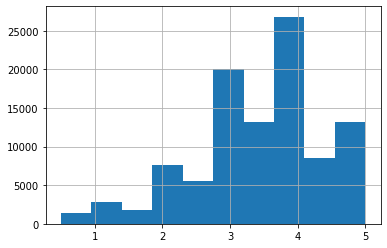

In [8]:
ratings.rating.hist()

In [9]:
np.sort(ratings.rating.unique())

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [10]:
# YOUR CODE HERE

# Install Surprise Library

In [11]:
!pip install surprise

     |████████████████████████████████| 11.8MB 354kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1618280 sha256=061414ac9f17b16ea824d1596f83766b07192a3ff5ef47e41c9c80235ad5a370
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


# Recommendation with Surprise Built-In Dataset

In [12]:
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

# sample random trainset and testset
# test set is made of 20% of the ratings.
trainset, testset = train_test_split(data, test_size=.20)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
rmse = accuracy.rmse(predictions)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k
RMSE: 0.9360


In [13]:
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import cross_validate

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9369  0.9260  0.9340  0.9364  0.9382  0.9343  0.0044  
MAE (testset)     0.7390  0.7285  0.7361  0.7402  0.7405  0.7368  0.0044  
Fit time          8.19    6.03    4.97    4.98    4.92    5.82    1.26    
Test time         0.29    0.23    0.16    0.24    0.15    0.21    0.05    


In [14]:
results

{'fit_time': (8.18911337852478,
  6.03084397315979,
  4.973132371902466,
  4.9814369678497314,
  4.9160544872283936),
 'test_mae': array([0.73896772, 0.728548  , 0.73608727, 0.74015387, 0.74049017]),
 'test_rmse': array([0.93686853, 0.92597932, 0.9339538 , 0.9364134 , 0.93821898]),
 'test_time': (0.29253411293029785,
  0.23353314399719238,
  0.15630578994750977,
  0.23709917068481445,
  0.14674830436706543)}

In [15]:
print("Average MAE: ", np.average(results["test_mae"]))
print("Average RMSE: ", np.average(results["test_rmse"]))

Average MAE:  0.7368494056548646
Average RMSE:  0.9342868054224001


# Recommendation with Custom Dataset

In [16]:
df = ratings[["userId","movieId","rating"]]
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [17]:
min_rating = df["rating"].min()
max_rating = df["rating"].max()

print("Rating range: {0} to {1}".format(min_rating, max_rating))

Rating range: 0.5 to 5.0


In [18]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

# Load the dataset into Surprise format
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(df, reader = reader)

# sample random trainset and testset
# test set is made of 20% of the ratings.
trainset, testset = train_test_split(data, test_size=.20)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
rmse = accuracy.rmse(predictions)

RMSE: 0.8690


In [19]:
predictions[0]

Prediction(uid=280, iid=1270, r_ui=3.5, est=4.146146813744935, details={'was_impossible': False})

In [20]:
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import cross_validate

# Load the dataset into Surprise format
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(df, reader = reader)

# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8740  0.8751  0.8660  0.8791  0.8740  0.8736  0.0043  
MAE (testset)     0.6731  0.6716  0.6664  0.6741  0.6701  0.6711  0.0027  
Fit time          5.11    5.01    5.15    5.04    5.10    5.08    0.05    
Test time         0.24    0.24    0.14    0.23    0.14    0.20    0.05    


In [21]:
results

{'fit_time': (5.110562324523926,
  5.00864577293396,
  5.1506242752075195,
  5.042943954467773,
  5.095376253128052),
 'test_mae': array([0.67309148, 0.67158152, 0.66638462, 0.67410923, 0.67014207]),
 'test_rmse': array([0.87404181, 0.87510862, 0.86601131, 0.87909909, 0.87396437]),
 'test_time': (0.23715472221374512,
  0.23969244956970215,
  0.13792896270751953,
  0.23253870010375977,
  0.13671302795410156)}

In [22]:
print("Average MAE: ", np.average(results["test_mae"]))
print("Average RMSE: ", np.average(results["test_rmse"]))

Average MAE:  0.6710617843906119
Average RMSE:  0.8736450420547671


# Hyperparameter Tuning

In [23]:
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import GridSearchCV

# Load the dataset into Surprise format
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(df, reader = reader)

param_grid = {
    'n_factors': [20, 50, 100],
    'n_epochs': [5, 10]
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.8776176820749425
{'n_factors': 20, 'n_epochs': 10}


In [24]:
best_factor = gs.best_params['rmse']['n_factors']
best_factor

20

In [25]:
best_epoch = gs.best_params['rmse']['n_epochs']
best_epoch

10

# Top-N Recommendation

In [26]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

# Load the dataset into Surprise format
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(df, reader = reader)

# sample random trainset and testset
# test set is made of 20% of the ratings.
trainset, testset = train_test_split(data, test_size=.20)

# We'll use the famous SVD algorithm.
algo = SVD(n_factors=best_factor, n_epochs=best_epoch)

# Train the algorithm on the trainset
algo.fit(trainset)

In [27]:
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [28]:
# Define user ID
userID = 1

In [29]:
# Get a list of all movie IDs from dataset
movie_ids = df["movieId"].unique()
movie_ids

array([     1,      3,      6, ..., 160836, 163937, 163981])

In [30]:
len(movie_ids)

9724

In [31]:
movie_ids_user = df.loc[df["userId"] == userID, "movieId"]
movie_ids_user

0         1
1         3
2         6
3        47
4        50
       ... 
227    3744
228    3793
229    3809
230    4006
231    5060
Name: movieId, Length: 232, dtype: int64

In [32]:
movie_ids_to_pred = np.setdiff1d(movie_ids, movie_ids_user)

In [33]:
test_set = [[userID, movie_id, 4] for movie_id in movie_ids_to_pred]

In [34]:
predictions = algo.test(test_set)

In [35]:
predictions[0]

Prediction(uid=1, iid=2, r_ui=4, est=4.271802857552697, details={'was_impossible': False})

In [36]:
pred_ratings = np.array([pred.est for pred in predictions])
pred_ratings

array([4.27180286, 4.06972992, 3.85645363, ..., 4.23204837, 4.31533612,
       4.31773865])

In [37]:
n_items = 10

In [38]:
print("Top {0} item recommendations for user {1}:".format(n_items, userID))
index_max = (-pred_ratings).argsort()[:n_items]
for i in index_max:
    movie_id = movie_ids_to_pred[i]
    print(movies[movies["movieId"]==movie_id]["title"].values[0], pred_ratings[i])

Top 10 item recommendations for user 1:
Lawrence of Arabia (1962) 5.0
Shawshank Redemption, The (1994) 5.0
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) 5.0
Godfather, The (1972) 5.0
Rear Window (1954) 5.0
Memento (2000) 4.987513652502978
Amadeus (1984) 4.985501052777822
Godfather: Part II, The (1974) 4.978297185792678
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001) 4.975721165387581
One Flew Over the Cuckoo's Nest (1975) 4.954240967339852


References:
- https://surprise.readthedocs.io/en/stable/getting_started.html
- https://blog.cambridgespark.com/tutorial-practical-introduction-to-recommender-systems-dbe22848392b